In [145]:
!apt-get update
!pip install selenium webdriver-manager flask

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,211 kB]
Fetched 3,596 kB in 3s (1,309 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubunt

In [146]:
# Descargar ChromeDriver
!wget https://chromedriver.storage.googleapis.com/114.0.5735.90/chromedriver_linux64.zip

# Descomprimir ChromeDriver
!unzip chromedriver_linux64.zip

--2025-05-07 21:46:15--  https://chromedriver.storage.googleapis.com/114.0.5735.90/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 74.125.137.207, ...
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7407250 (7.1M) [application/zip]
Saving to: ‘chromedriver_linux64.zip.3’

chromedriver_linux6 100%[===================>]   7.06M  41.6MB/s    in 0.2s    

2025-05-07 21:46:16 (41.6 MB/s) - ‘chromedriver_linux64.zip.3’ saved [7407250/7407250]

Archive:  chromedriver_linux64.zip
replace chromedriver? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace LICENSE.chromedriver? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [147]:
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

# Configuración más detallada de las opciones de Chrome
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--disable-gpu')

# Configurar la ruta del driver
service = Service('/usr/bin/chromedriver')

In [ ]:
import os
os.makedirs('../datos/informacion', exist_ok=True)
os.makedirs('../datos/estadisticas', exist_ok=True)
os.makedirs('../datos/relaciones', exist_ok=True)

### Loguearse en la página

In [221]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
import time

# --- OPCIONES DEL NAVEGADOR ---
options = Options()

options.add_argument("--headless")
options.add_argument("--disable-gpu")
options.add_argument("--start-maximized")  # Abrir en ventana maximizada
options.add_argument("--window-size=1920,1080")  # Tamaño fijo opcional

# --- INICIALIZAR CHROME ---
driver = webdriver.Chrome(options=chrome_options)

# --- ABRIR UNA PÁGINA ---
driver.get("https://boardgamegeek.com/boardgame/266524/parks/credits")

# El botón para abrir el formulario de login tiene el ID 'login_button'
wait = WebDriverWait(driver, 10)
login_button = driver.find_element(By.CSS_SELECTOR, 'button[login-required]')
login_button.click()

# Rellenar el formulario de inicio de sesión
# Encontrar los campos de usuario y contraseña (ajustar según la página)
username_field = driver.find_element(By.ID, 'inputUsername')
password_field = driver.find_element(By.ID, 'inputPassword')

username_field.send_keys('nlp2025')
password_field.send_keys('nlp2025')

# Enviar el formulario (presionar Enter o el botón de login)
#password_field.send_keys(Keys.RETURN)

# O también podrías encontrar el botón de login y hacer click:
# login_submit_button = driver.find_element(By.ID, 'submit_login')
# login_submit_button.click()

# Esperar unos segundos para que la página cargue después del login
time.sleep(5)

###Función para contar caracteres

In [148]:
#Funcion para contar la cantidad de caracteres luego de las extracciones.
def contarCaracteres(texto):
    texto_limpio = texto.replace(" ", "").replace("\n", "").replace("\t", "")

    return len(texto_limpio)

caracteres = 0

##Extracción de Estadísticas

### Stats

In [136]:
pip install beautifulsoup4 requests

In [137]:
import requests
from bs4 import BeautifulSoup

In [138]:
#from selenium import webdriver
#from selenium.webdriver.common.by import By
#from selenium.webdriver.support.ui import WebDriverWait
#from selenium.webdriver.support import expected_conditions as EC
#from selenium.webdriver.support.ui import WebDriverWait
#from webdriver_manager.chrome import ChromeDriverManager

In [139]:
url = 'https://boardgamegeek.com/boardgame/266524/parks/stats'

# Abrir la página web
driver.get(url)

# Esperar a que la página cargue completamente
time.sleep(3)  # Ajusta el tiempo de espera según sea necesario

# Obtener el contenido de la página
page_source = driver.page_source

# Usar BeautifulSoup para analizar el contenido de la página
soup = BeautifulSoup(page_source, 'html.parser')

# Encontrar todos los elementos con la clase 'outline-item-title' y 'outline-item-description'
titles = soup.find_all(class_='outline-item-title')
descriptions = soup.find_all(class_='outline-item-description')

# Preparar listas para almacenar los datos
data = []

# Extraer datos y agregarlos a la lista
for title, description in zip(titles, descriptions):
    title_text = title.get_text(strip=True)
    description_text = description.get_text(strip=True)
    data.append({'Título': title_text, 'Descripción': description_text})

# Crear un DataFrame a partir de los datos
df = pd.DataFrame(data)

# Mostrar el DataFrame
print(df)

# Guardar el DataFrame en un archivo CSV (opcional)
df.to_csv('../datos/estadisticas/boardgame_data.csv', index=False, encoding='utf-8')

            Título                    Descripción
0      Avg. Rating                          7.644
1   No. of Ratings                         28,361
2   Std. Deviation                           1.22
3           Weight                        2.12/ 5
4         Comments                          4,291
5             Fans                          2,463
6       Page Views                      1,785,666
7     Overall Rank             157Historical Rank
8      Family Rank              24Historical Rank
9   All Time Plays                         99,996
10      This Month                            182
11             Own                         50,312
12     Prev. Owned                          2,873
13       For Trade      388Find For-Trade Matches
14   Want In Trade  798Find Want-in-Trade Matches
15        Wishlist                         10,415
16       Has Parts                             13
17      Want Parts                             10


### Credits

In [140]:
driver.get('https://boardgamegeek.com/boardgame/266524/parks/credits')

#Extraccion de datos del juego.
datos_juego = []

items = driver.find_elements(By.CLASS_NAME, 'outline-item')
for item in items:
    datos_juego.append(item.text)

game_header = driver.find_elements(By.CLASS_NAME, 'gameplay-item-primary')
for header in game_header:
    datos_juego.append(header.text)

for i in range(0,len(datos_juego)):
    datos_juego[i] = datos_juego[i].replace('\n', ' ')
    datos_juego[i] = datos_juego[i].replace('Complexity Rating', '')

datos = pd.DataFrame([{
    'Nombre Primario': datos_juego[0].replace("Primary Name ", ""),
    'Nombres Alternativos': datos_juego[1].replace("Alternate Names ", ""),
    'Lanzamiento': datos_juego[2].replace("Year Released ", ""),
    'Diseñador': datos_juego[3].replace("Designer ", ""),
    'Publicado por': datos_juego[5].replace("Publisher ", ""),
    'Editor': datos_juego[10].replace("Editor ", ""),
    'Insert Designers': datos_juego[12].replace("Insert Designers",""),
    'Categorias': datos_juego[13].replace("Categories ",""),
    'Mecanismos': datos_juego[14].replace("Mechanics ",""),
    'Familia': datos_juego[15].replace("Family ",""),
    'Jugadores': datos_juego[16].replace(" Players",""),
    'Tiempo de juego': datos_juego[17],
    'Edad': datos_juego[18].replace("Age: ",""),
    'Complejidad': datos_juego[19].replace("Weight: ","")
}])

In [141]:
datos.to_csv('../datos/estadisticas/credits.csv', index=False, encoding='utf-8')

### Ratings

In [153]:
base_url = "https://boardgamegeek.com/boardgame/266524/parks/ratings"
total_needed = 500  # Cambia esto según cuántas reseñas quieres
collected = 0
pageid = 1

banderas_validas = [
    "United States Flag",
    "Canada Flag",
    "United Kingdom Flag"
]

resultados = []

while collected < total_needed:
    url = f"{base_url}?pageid={pageid}&comment=1" if pageid > 1 else base_url
    print(f'Cargando página {pageid}...')
    driver.get(url)
    time.sleep(3)  # Ajusta según sea necesario

    # Encuentra todos los bloques de comentarios
    items = driver.find_elements(By.CSS_SELECTOR, 'li.summary-item.summary-rating-item')

    found_on_page = 0
    for item in items:
        try:
            # --- Comentario ---
            comentario_tag = item.find_element(By.CSS_SELECTOR, 'p.mb-0.ng-binding.ng-scope')
            comentario_texto = comentario_tag.get_attribute('innerText').strip()
            palabras = comentario_texto.split()
            if len(palabras) <= 10:
                continue

            # --- Bandera (país) ---
            try:
                bandera_img = item.find_element(By.CSS_SELECTOR, '.comment-header-location-flag img')
                bandera_alt = bandera_img.get_attribute('alt')
            except:
                bandera_alt = None

            if bandera_alt not in banderas_validas:
                continue

            # --- Rating ---
            try:
                rating_tag = item.find_element(By.CSS_SELECTOR, '.summary-item-callout .rating-angular')
                rating = rating_tag.text.strip()
            except:
                rating = None

            resultados.append({
                'puntaje': rating,
                'reseña': comentario_texto
            })
            collected += 1
            found_on_page += 1

            if collected >= total_needed:
                break
        except Exception as err:
            continue

    if found_on_page == 0:
        print("No se encontraron comentarios válidos en esta página, deteniendo la búsqueda.")
        break

    pageid += 1

# Crea el DataFrame
df = pd.DataFrame(resultados)
print(df.head())

Cargando página 1...
Cargando página 2...
Cargando página 3...
Cargando página 4...
Cargando página 5...
Cargando página 6...
Cargando página 7...
Cargando página 8...
Cargando página 9...
Cargando página 10...
Cargando página 11...
Cargando página 12...
Cargando página 13...
Cargando página 14...
Cargando página 15...
Cargando página 16...
Cargando página 17...
Cargando página 18...
Cargando página 19...
Cargando página 20...
Cargando página 21...
Cargando página 22...
Cargando página 23...
Cargando página 24...
Cargando página 25...
Cargando página 26...
Cargando página 27...
Cargando página 28...
Cargando página 29...
Cargando página 30...
Cargando página 31...
Cargando página 32...
Cargando página 33...
Cargando página 34...
Cargando página 35...
Cargando página 36...
Cargando página 37...
Cargando página 38...
Cargando página 39...
Cargando página 40...
Cargando página 41...
Cargando página 42...
Cargando página 43...
Cargando página 44...
Cargando página 45...
Cargando página 46.

In [210]:
df.to_csv('../datos/estadisticas/reseñas_parks.csv', index = False)

#Extracción Información

## Extraccion de overview:

In [224]:
import pandas as pd

In [225]:
def stringToTxt(string, nombre):
    archivo = open(nombre, "w")
    archivo.write(string)
    archivo.close()

In [226]:
driver.get('https://boardgamegeek.com/boardgame/266524/parks')

#Extraccion de la descripcion del juego.
body_descripcion = driver.find_element(By.CLASS_NAME, 'expandable-body')
parrafos = body_descripcion.find_elements(By.TAG_NAME, 'p')
descripcion = "\n".join([parrafo.text for parrafo in parrafos]).replace('!', 'PARKS!')

In [227]:
stringToTxt(descripcion, "../datos/informacion/descripcion_juego.txt")

In [222]:
caracteres = 0
caracteres += contarCaracteres(descripcion)
caracteres_descripcion_juego = caracteres

In [223]:
print(f"Cantidad de caracteres: {caracteres_descripcion_juego}")

Cantidad de caracteres: 952


## Extracción de foros:

### Variants

In [ ]:
#URL de los foros de Variants.
url_foro = "https://boardgamegeek.com/boardgame/266524/parks/forums/69"
driver.get(url_foro)
time.sleep(3)

hilos = driver.find_elements(By.CSS_SELECTOR, "a[href^='/thread/']")  # todos los <a> que empiezan con /thread/

links_hilos = []
for hilo in hilos:
    link = hilo.get_attribute('href')
    if link:  # asegurar que no sea None
        link_completo = "https://boardgamegeek.com" + link if link.startswith("/thread/") else link
        links_hilos.append(link_completo)

#Eliminar los links repetidos
links_unicos = list(set(links_hilos))

In [ ]:
textos_foros_variants = []

for link in links_unicos:
    driver.get(link)
    time.sleep(2)

    posts = driver.find_elements(By.TAG_NAME, "gg-markup-safe-html")

    for post in posts:
        texto = post.text.strip()
        if texto:
            textos_foros_variants.append(texto)

textos_foros_variants = list(set(textos_foros_variants))

In [ ]:
with open('../datos/informacion/texto_foros_variants.txt', 'w', encoding='utf-8') as archivo:
    for linea in textos_foros_variants:
        archivo.write(linea + '\n')  # Escribir cada string en una nueva línea

In [200]:
caracteres = 0
for texto in textos_foros_variants:
    caracteres += contarCaracteres(texto)
    caracteres_foro_variants = caracteres

In [201]:
print(f"Cantidad de caracteres: {caracteres_foro_variants}")

Cantidad de caracteres: 138259


### Strategy

In [ ]:
#URL de los foros de Strategy.
url_foro = "https://boardgamegeek.com/boardgame/266524/parks/forums/67"
driver.get(url_foro)
time.sleep(3)

hilos = driver.find_elements(By.CSS_SELECTOR, "a[href^='/thread/']")  # todos los <a> que empiezan con /thread/

links_hilos = []
for hilo in hilos:
    link = hilo.get_attribute('href')
    if link:  # asegurar que no sea None
        link_completo = "https://boardgamegeek.com" + link if link.startswith("/thread/") else link
        links_hilos.append(link_completo)

#Eliminar los links repetidos
links_unicos = list(set(links_hilos))

In [ ]:
textos_foros_strategy = []

for link in links_unicos:
    driver.get(link)
    time.sleep(2)

    posts = driver.find_elements(By.TAG_NAME, "gg-markup-safe-html")

    for post in posts:
        texto = post.text.strip()
        if texto:
            textos_foros_strategy.append(texto)

textos_foros_strategy = list(set(textos_foros_strategy))

In [ ]:
with open('../datos/informacion/texto_foros_strategy.txt', 'w', encoding='utf-8') as archivo:
    for linea in textos_foros_strategy:
        archivo.write(linea + '\n')  # Escribir cada string en una nueva línea

In [202]:
caracteres = 0
for texto in textos_foros_strategy:
    caracteres += contarCaracteres(texto)
    caracteres_foro_strategy = caracteres

In [203]:
print(f"Cantidad de caracteres: {caracteres_foro_strategy}")

Cantidad de caracteres: 18655


### News

In [ ]:
#URL de los foros de News.
url_foro = "https://boardgamegeek.com/boardgame/266524/parks/forums/68"
driver.get(url_foro)
time.sleep(3)

hilos = driver.find_elements(By.CSS_SELECTOR, "a[href^='/thread/']")  # todos los <a> que empiezan con /thread/

links_hilos = []
for hilo in hilos:
    link = hilo.get_attribute('href')
    if link:  # asegurar que no sea None
        link_completo = "https://boardgamegeek.com" + link if link.startswith("/thread/") else link
        links_hilos.append(link_completo)

#Eliminar los links repetidos
links_unicos = list(set(links_hilos))

In [ ]:
textos_foros_news = []

for link in links_unicos:
    driver.get(link)
    time.sleep(2)

    posts = driver.find_elements(By.TAG_NAME, "gg-markup-safe-html")

    for post in posts:
        texto = post.text.strip()
        if texto:
            textos_foros_news.append(texto)

textos_foros_news = list(set(textos_foros_news))

In [ ]:
with open('../datos/informacion/texto_foros_news.txt', 'w', encoding='utf-8') as archivo:
    for linea in textos_foros_news:
        archivo.write(linea + '\n')  # Escribir cada string en una nueva línea

In [204]:
caracteres = 0
for texto in textos_foros_news:
    caracteres += contarCaracteres(texto)
    caracteres_foro_news = caracteres

In [205]:
print(f"Cantidad de caracteres: {caracteres_foro_news}")

Cantidad de caracteres: 17523


###Rules

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from urllib.parse import urljoin

base_forum_url = "https://boardgamegeek.com/boardgame/266524/parks/forums/66"
base_url = "https://boardgamegeek.com"

lista_links = []
vistos = set()

NUM_PAGINAS = 6  # Ajustar si hay más

for pageid in range(1, NUM_PAGINAS + 1):
    if pageid == 1:
        url = base_forum_url
    else:
        url = f"{base_forum_url}?pageid={pageid}"

    driver.get(url)
    time.sleep(3)  # Esperar a que cargue

    print(f"Accediendo a la página {pageid}: {url}")

    # Buscar todos los enlaces a hilos de conversación
    links = driver.find_elements(By.CSS_SELECTOR, 'a[href*="/thread/"]')

    for link in links:
        href = link.get_attribute('href')

        if href and "/thread/" in href and "/thread/new" not in href and "/login" not in href:
            href = urljoin(base_url, href).rstrip("/")

            if href not in vistos:
                lista_links.append(href)
                vistos.add(href)

In [ ]:
textos_foros_rules = []

for link in lista_links:
    driver.get(link)
    time.sleep(2)

    posts = driver.find_elements(By.TAG_NAME, "gg-markup-safe-html")

    for post in posts:
        texto = post.text.strip()
        if texto:
            textos_foros_rules.append(texto)

textos_foros_rules = list(set(textos_foros_rules))

In [ ]:
with open('../datos/informacion/texto_foros_rules.txt', 'w', encoding='utf-8') as archivo:
    for linea in textos_foros_rules:
        archivo.write(linea + '\n')  # Escribir cada string en una nueva línea

In [207]:
caracteres = 0
for texto in textos_foros_rules:
    caracteres += contarCaracteres(texto)
    caracteres_foro_rules = caracteres

In [208]:
print(f"Cantidad de caracteres: {caracteres_foro_rules}")

Cantidad de caracteres: 436623


In [209]:
caracteres_foro = caracteres_foro_news + caracteres_foro_strategy + caracteres_foro_variants + caracteres_foro_rules
print(caracteres_foro)

611060


## Extracción de la página Misutmeeple:

In [189]:
# Url de la página de reseña de PARKS.
url = 'https://misutmeeple.com/2021/12/resena-parks/'

# Enviar una solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    html_content = response.text
    print("Página obtenida con éxito")
else:
    print(f"Error {response.status_code}")

Página obtenida con éxito


In [190]:
# Crear el objeto BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

In [191]:
secciones = {}

# Recorremos cada sección marcada por <h2>
for h2 in soup.find_all('h2'):
    titulo = h2.get_text(strip=True)
    contenido = []

    # Recorremos los elementos siguientes hasta otro <h2>
    for sibling in h2.find_next_siblings():
        if sibling.name == 'h2':
            break

        if sibling.name == 'p':
            contenido.append(sibling.get_text(strip=True))

        elif sibling.name == 'ul':
            # Agregar todos los <li> dentro del <ul>
            for li in sibling.find_all('li'):
                contenido.append(f"- {li.get_text(strip=True)}")

        elif sibling.name == 'ol':
            # Agregar los <li> en listas ordenadas también
            for idx, li in enumerate(sibling.find_all('li'), start=1):
                contenido.append(f"{idx}. {li.get_text(strip=True)}")

    # Guardar el texto agrupado en el diccionario
    secciones[titulo] = "\n".join(contenido)

In [192]:
secciones = dict(list(secciones.items())[:4])

In [193]:
secciones.keys()

dict_keys(['Introducción', 'Contenido', 'Mecánica', 'Opinión Personal'])

In [194]:
with open('../datos/informacion/texto_misutmeeple_introduccion.txt', 'w', encoding='utf-8') as archivo:
    archivo.write(secciones['Introducción'])

In [195]:
with open('../datos/informacion/texto_misutmeeple_contenido.txt', 'w', encoding='utf-8') as archivo:
    archivo.write(secciones['Contenido'])

In [196]:
with open('../datos/informacion/texto_misutmeeple_mecanica.txt', 'w', encoding='utf-8') as archivo:
    archivo.write(secciones['Mecánica'])

In [197]:
with open('../datos/informacion/texto_misutmeeple_opinion.txt', 'w', encoding='utf-8') as archivo:
    archivo.write(secciones['Opinión Personal'])

In [198]:
caracteres = 0
for key in ['Introducción','Contenido','Mecánica','Opinión Personal']:
    texto = secciones[key]
    caracteres += contarCaracteres(texto)
    caracteres_misutmeeple = caracteres

In [199]:
print(f"Cantidad de caracteres: {caracteres_misutmeeple}")

Cantidad de caracteres: 18226


## Extracción PDF

In [183]:
pip install PyPDF2

In [184]:
import PyPDF2

def leerPDF(ruta):
    # Abre el archivo en modo binario de lectura ('rb')
    with open(ruta, 'rb') as archivo:
        # Crea un objeto PdfFileReader
        lector = PyPDF2.PdfReader(archivo)

        # Inicializa una cadena vacía para almacenar el texto
        texto = ''

        # Itera sobre todas las páginas del PDF
        for i in range(len(lector.pages)):
            # Obtiene la página
            pagina = lector.pages[i]

            # Extrae el texto de la página y lo añade a la cadena de texto
            texto += pagina.extract_text ()

    # Imprime el texto extraído
    return texto

def stringToTxt(string, nombre):
    archivo = open(nombre, "w")
    archivo.write(string)
    archivo.close()

In [185]:
texto_reglas_espanol_pdf = leerPDF("../archivos/Parks_-_Reglas_a_la_JcK.pdf")
texto_reglas_ingles_pdf = leerPDF("../archivos/Rules1_1Small.pdf")

In [186]:
stringToTxt(texto_reglas_espanol_pdf, "../datos/informacion/reglas_pdf_espanol.txt")
stringToTxt(texto_reglas_ingles_pdf, "../datos/informacion/reglas_pdf_ingles.txt")

In [187]:
caracteres = 0
caracteres += contarCaracteres(texto_reglas_espanol_pdf)
caracteres += contarCaracteres(texto_reglas_ingles_pdf)
caracteres_pdf = caracteres

In [188]:
print(f"Cantidad de caracteres: {caracteres_pdf}")

Cantidad de caracteres: 27150


##Extracción Videos

In [177]:
pip install youtube-transcript-api

In [211]:
from youtube_transcript_api import YouTubeTranscriptApi

def transcripcionDeVideos(link, language):
    transcripcion = YouTubeTranscriptApi.get_transcript(link, languages=[language])
    texto = " ".join([frase['text'] for frase in transcripcion])

    return texto

def stringToTxt(string, nombre):
    archivo = open(nombre, "w")
    archivo.write(string)
    archivo.close()

def listStringsToTxt(lista, nombre_archivo):
    for i in range(len(lista)):
        stringToTxt(lista[i], "../datos/informacion/" + nombre_archivo + str(i+1) + ".txt")

In [212]:
links_reviews_es = ['2gmRvrgWHAU','AmvPFELgBzM','_9nwrm5dnvw','J2giTJIEeFc','hpRYK92Tp5w']
links_reviews_en = ['webI4VJfllA','DXrLDzUKwx4','ZiLFlgXxbTM']
links_htp = ['IK8e0MvD_ls','xqq1R_kFwIk','tMlp5EREKsE','67QGD6k0EEQ','4j2Znqn_eJk','67QGD6k0EEQ','xqq1R_kFwIk']

texto_reviews_es = []
for link in links_reviews_es:
    texto_reviews_es.append(transcripcionDeVideos(link,'es'))

texto_reviews_en = []
for link in links_reviews_en:
    texto_reviews_en.append(transcripcionDeVideos(link,'en'))

texto_htp = []
for link in links_htp:
    texto_htp.append(transcripcionDeVideos(link,'es'))

In [213]:
listStringsToTxt(texto_reviews_es, "reviews_videos_es_")
listStringsToTxt(texto_reviews_en, "reviews_videos_en_")
listStringsToTxt(texto_htp, "htp_videos_es_")

In [214]:
caracteres = 0
for texto in texto_reviews_es:
    caracteres += contarCaracteres(texto)

for texto in texto_reviews_en:
    caracteres += contarCaracteres(texto)

for texto in texto_htp:
    caracteres += contarCaracteres(texto)
caracteres_transcripcion_videos = caracteres

In [215]:
print(f"Cantidad de caracteres: {caracteres_transcripcion_videos}")

Cantidad de caracteres: 203815


#Extracción Relaciones

In [219]:
url = "https://boardgamegeek.com/boardgame/266524/parks/credits"
driver.get(url)
time.sleep(5)

juego = "PARKS"
relaciones_extraidas = []

# Obtener todos los bloques de relación
bloques_relacion = driver.find_elements(By.CSS_SELECTOR, '.outline-item')

for bloque in bloques_relacion:
    try:
        # Extraer tipo de relación
        relacion = bloque.find_element(By.CSS_SELECTOR, '.outline-item-title.outline-item-title-lg').text.strip()

        # Extraer sujetos relacionados
        sujetos_elem = bloque.find_elements(By.CSS_SELECTOR, '.outline-item-description')

        for s in sujetos_elem:
            texto = s.text.strip()
            if texto and texto.upper() != "N/A":
                sujetos_individuales = texto.split("\n")
                for sujeto in sujetos_individuales:
                    sujeto_limpio = sujeto.strip()
                    if sujeto_limpio:
                        relaciones_extraidas.append((juego, relacion, sujeto_limpio))

    except Exception as e:
        pass  # Silenciar errores para mantener salida limpia

driver.quit()

# Guardar en CSV con una fila por cada sujeto2
df = pd.DataFrame(relaciones_extraidas, columns=["SUJETO1", "RELACION", "SUJETO2"])
df.to_csv("../datos/relaciones/relaciones_parks.csv", index=False)


In [220]:
df = pd.read_csv("../datos/relaciones/relaciones_parks.csv")
df

,SUJETO1,RELACION,SUJETO2
0,PARKS,Primary Name,PARKS
1,PARKS,Alternate Names,Parki
2,PARKS,Alternate Names,PARKY
3,PARKS,Alternate Names,Парки
4,PARKS,Alternate Names,國家公園：自然之旅
5,PARKS,Year Released,2019
6,PARKS,Designer,Henry Audubon
7,PARKS,Artist,Fifty-Nine Parks Print Series
8,PARKS,Publishers,Keymaster Games
9,PARKS,Publishers,Albi


#Analisis Post-Extracción

In [164]:
import matplotlib.pyplot as plt
import numpy as np

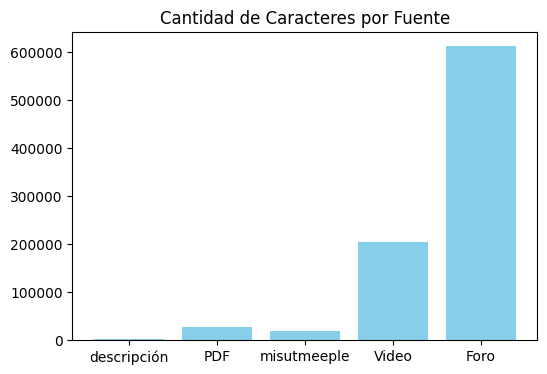

In [165]:
# Gráfico de Caracteres
plt.figure(figsize=(6, 4))
plt.bar(['descripción', 'PDF', 'misutmeeple', 'Video', 'Foro' ], [caracteres_descripcion_juego, caracteres_pdf, caracteres_misutmeeple, caracteres_transcripcion_videos,
                                  caracteres_foro], color='skyblue')
plt.title('Cantidad de Caracteres por Fuente')
plt.show()

In [166]:
# Función para contar palabras
def contar_palabras(texto):
    return len(texto.split())


In [167]:
palabras_descripcion = contar_palabras(descripcion)

palabras_foro = 0
for texto in textos_foros_variants:
    palabras_foro += contar_palabras(texto)
for texto in textos_foros_news:
    palabras_foro += contar_palabras(texto)
for texto in textos_foros_rules:
    palabras_foro += contar_palabras(texto)
for texto in textos_foros_strategy:
    palabras_foro += contar_palabras(texto)

palabras_misutmeeple = 0
for key in ['Introducción','Contenido','Mecánica','Opinión Personal']:
    texto = secciones[key]
    palabras_misutmeeple += contar_palabras(texto)

palabras_pdf = 0
palabras_pdf += contar_palabras(texto_reglas_espanol_pdf)
palabras_pdf += contar_palabras(texto_reglas_ingles_pdf)

palabras_videos = 0
for texto in texto_reviews_es:
    palabras_videos += contar_palabras(texto)
for texto in texto_reviews_en:
    palabras_videos += contar_palabras(texto)
for texto in texto_htp:
    palabras_videos += contar_palabras(texto)



print(f"Cantidad de palabras descripción: {palabras_descripcion}")
print(f"Cantidad de palabras foro: {palabras_foro}")
print(f"Cantidad de palabras misutmeeple: {palabras_misutmeeple}")
print(f"Cantidad de palabras PDF: {palabras_pdf}")
print(f"Cantidad de palabras Videos: {palabras_videos}")

Cantidad de palabras descripción: 200
Cantidad de palabras foro: 141508
Cantidad de palabras misutmeeple: 3718
Cantidad de palabras PDF: 6094
Cantidad de palabras Videos: 48581


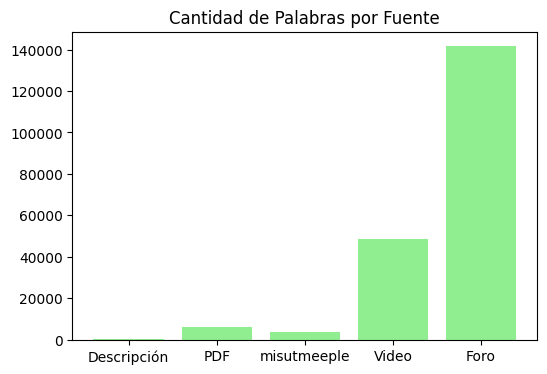

In [168]:
# Gráfico de Palabras
plt.figure(figsize=(6, 4))
plt.bar(['Descripción', 'PDF', 'misutmeeple', 'Video', 'Foro'], [palabras_descripcion, palabras_pdf, palabras_misutmeeple, palabras_videos, palabras_foro], color='lightgreen')
plt.title('Cantidad de Palabras por Fuente')
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


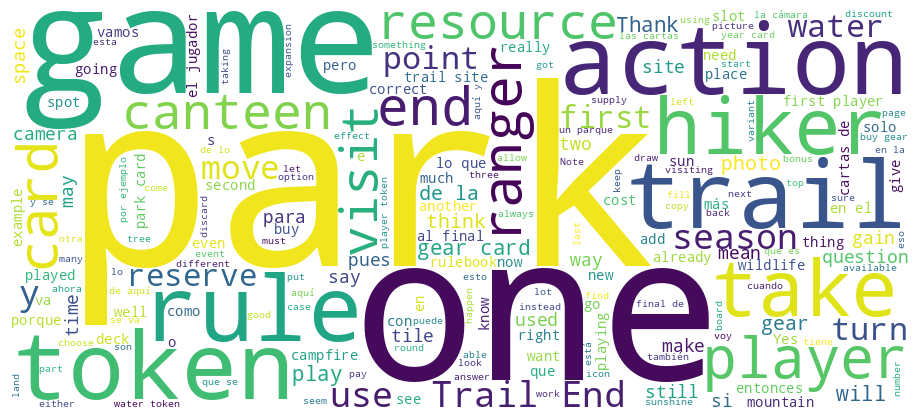

In [162]:
# Instalar la librería WordCloud
!pip install wordcloud

from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Descargar recursos necesarios
nltk.download('punkt')

# Función para generar la nube de palabras
def generar_nube(texto, titulo):
    wordcloud = WordCloud(width=900, height=400,
                          background_color='white',
                          min_font_size=10).generate(texto)

    plt.figure(figsize=(9, 4), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

# Concatenar todos los textos en uno solo
textos_unificados = (
    descripcion + " " +
    " ".join(textos_foros_variants) + " " +
    " ".join(textos_foros_news) + " " +
    " ".join(textos_foros_rules) + " " +
    " ".join(textos_foros_strategy) + " " +
    " ".join([secciones[key] for key in ['Introducción', 'Contenido', 'Mecánica', 'Opinión Personal']]) + " " +
    texto_reglas_espanol_pdf + " " +
    texto_reglas_ingles_pdf + " " +
    " ".join(texto_reviews_es + texto_reviews_en + texto_htp)
)


generar_nube(textos_unificados, "Todos los Textos")

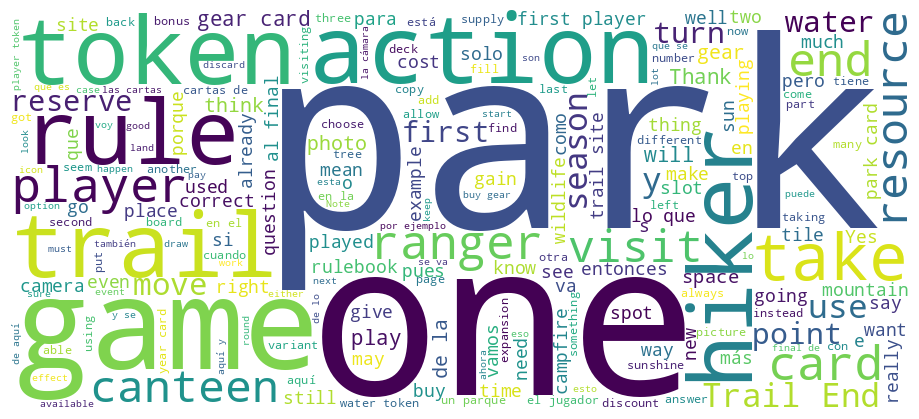

In [163]:
generar_nube(textos_unificados, "Todos los Textos")